In [1]:
%matplotlib inline

# Assuming we are in the notebooks directory, we need to move one up:
%cd ../..

/home/olivia/Code/neural_link_SV_iDE


In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set(font_scale=1.8)
sns.set_style('ticks')


# files for FSL: gain, loss, risk, entropy, a*gain+b*loss

In [3]:
df = pd.read_csv('./data/participants_and_model.csv')
df['chosen'] = df['accept']
df['chosen*gain'] = df['chosen'] *  df['gain']
df['chosen*loss'] = df['chosen'] *  df['loss']
df['chosen*entropy'] = df['chosen'] *  df['entropy']
df['risk*entropy'] = df['chosen'] *  df['entropy']


In [4]:
df.columns

Index(['trial', 'onset', 'duration', 'gain', 'loss', 'RT',
       'participant_response', 'ID', 'run', 'risk', 'use', 'accept', 'group',
       'gender', 'age', 'intercept', 'p_accept', 'entropy', 'mc_loss',
       'mc_gain', 'mc_entropy', 'gain_coef', 'loss_coef', 'intercept_coef',
       'loglikelihood', 'chosen', 'chosen*gain', 'chosen*loss',
       'chosen*entropy', 'risk*entropy'],
      dtype='object')

In [5]:
variables = ['mc_loss', 'mc_gain', 'mc_entropy', 'intercept', 'mc_subjective_value' ]


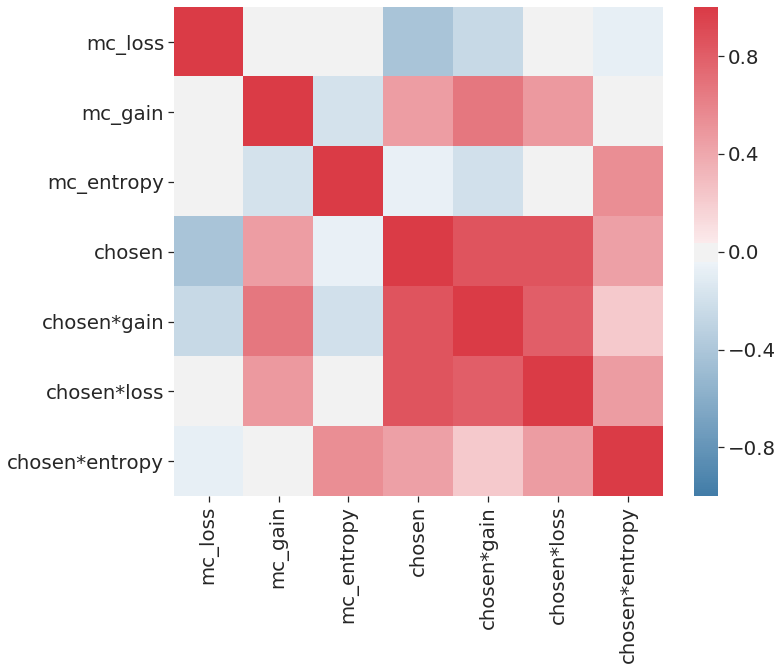

In [6]:
corr = df[['mc_loss', 'mc_gain', 'mc_entropy', 'chosen',
   'chosen*gain', 'chosen*loss', 'chosen*entropy']].corr()
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,square=True, vmin=-corr.max().max(), vmax=corr.max().max())
plt.show()

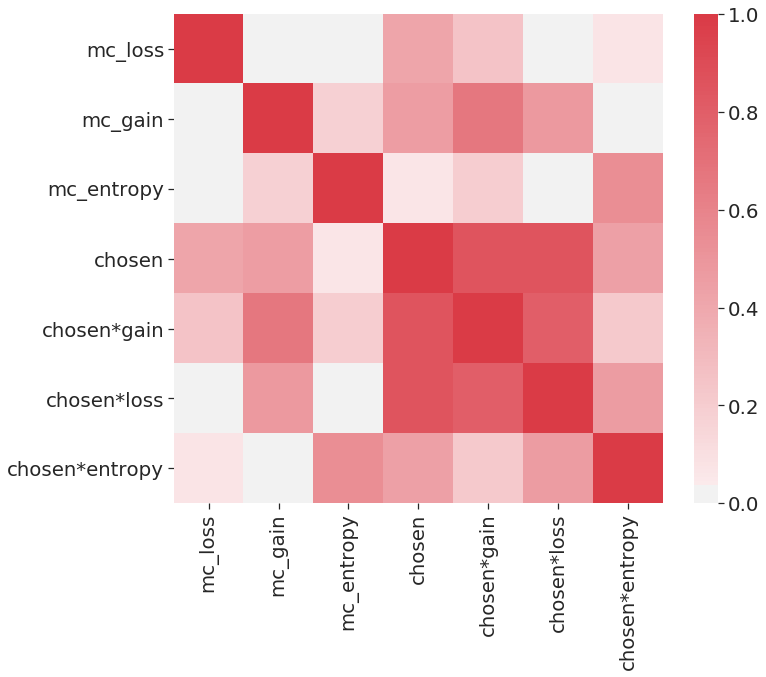

In [7]:
corr = df[['mc_loss', 'mc_gain', 'mc_entropy', 'chosen',
   'chosen*gain', 'chosen*loss', 'chosen*entropy']].corr()
corr = np.fabs(corr)
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,square=True, vmin=0, vmax=corr.max().max())
plt.show()

In [8]:
corr

,mc_loss,mc_gain,mc_entropy,chosen,chosen*gain,chosen*loss,chosen*entropy
mc_loss,1.000000,0.001458,0.005889,0.419781,0.255520,0.006560,0.072366
mc_gain,0.001458,1.000000,0.182187,0.455549,0.666631,0.477420,0.024622
mc_entropy,0.005889,0.182187,1.000000,0.067660,0.197835,0.029023,0.544983
chosen,0.419781,0.455549,0.067660,1.000000,0.852180,0.854928,0.444766
chosen*gain,0.255520,0.666631,0.197835,0.852180,1.000000,0.804003,0.219790
chosen*loss,0.006560,0.477420,0.029023,0.854928,0.804003,1.000000,0.464580
chosen*entropy,0.072366,0.024622,0.544983,0.444766,0.219790,0.464580,1.000000


In [9]:
# get each person's ID
IDs = df['ID'].unique()
print(IDs)

[  1   2   3   4   5   6   8   9  10  11  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  29  30  32  33  35  36  37  38  39  40  41  43
  44  45  46  47  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  66  67  68  69  70  71  72  73  74  75  76  77  79  80  81  82
  83  84  85  87  88  89  90  92  93  94  95  96  98  99 100 102 103 104
 105 106 107 108 109 110 112 113 114 115 116 117 118 119 120 121 123 124]


In [10]:
# For each participant...
for ID in IDs:
    p_df = df[df['ID'] == ID]

    runs = p_df['run'].unique()
    assert (runs == [1, 2, 3, 4]).all()
    for run in runs:
        r_df = p_df[p_df['run'] == run]
        for variable in variables:
            path = './data/behavior/' + variable + '/'
            filepath = (path + str(ID) + '_' + str(run) +
                       '_' + variable + '.txt')
            columns = ['onset', 'duration', variable]
            # onset, duration, VARIABLE, one file per run
            try:
                os.mkdir(path)
            except FileExistsError:
                None
            r_df.iloc[0:len(r_df)-1].to_csv(filepath, sep=' ', index=False,
                                            header=False, columns=columns)
            r_df.iloc[[len(r_df)-1]].to_csv(filepath,
                                            sep=' ', index=False,
                                            header=False, columns=columns,
                                            mode='a', line_terminator="")



/home/olivia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [11]:
r_df

,trial,onset,duration,gain,loss,RT,participant_response,ID,run,risk,...,mc_entropy,gain_coef,loss_coef,intercept_coef,loglikelihood,chosen,chosen*gain,chosen*loss,chosen*entropy,risk*entropy
44920,1,4.048,4,10,6,1.339,weakly_accept,124,4,5.830952,...,-0.045302,5.344673,-5.781355,-7.755088,-8.0898,1,10,6,2.882130e-04,2.882130e-04
44921,2,13.132,4,13,18,1.338,strongly_reject,124,4,11.101802,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44922,3,18.333,4,11,18,1.031,strongly_reject,124,4,10.547512,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44923,4,24.434,4,10,11,1.031,weakly_reject,124,4,7.433034,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44924,5,32.135,4,17,6,1.956,strongly_accept,124,4,9.013878,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,1,17,6,0.000000e+00,0.000000e+00
44925,6,40.330,4,15,13,1.443,weakly_reject,124,4,9.924717,...,0.283856,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44926,7,49.430,4,9,10,1.134,weakly_reject,124,4,6.726812,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44927,8,56.330,4,20,10,1.341,strongly_accept,124,4,11.180340,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,1,20,10,0.000000e+00,0.000000e+00
44928,9,64.331,4,17,5,1.340,strongly_accept,124,4,8.860023,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,1,17,5,0.000000e+00,0.000000e+00
44929,10,69.931,4,15,19,1.236,strongly_reject,124,4,12.103718,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00


In [12]:
r_df.columns

Index(['trial', 'onset', 'duration', 'gain', 'loss', 'RT',
       'participant_response', 'ID', 'run', 'risk', 'use', 'accept', 'group',
       'gender', 'age', 'intercept', 'p_accept', 'entropy', 'mc_loss',
       'mc_gain', 'mc_entropy', 'gain_coef', 'loss_coef', 'intercept_coef',
       'loglikelihood', 'chosen', 'chosen*gain', 'chosen*loss',
       'chosen*entropy', 'risk*entropy'],
      dtype='object')

In [13]:
r_df

,trial,onset,duration,gain,loss,RT,participant_response,ID,run,risk,...,mc_entropy,gain_coef,loss_coef,intercept_coef,loglikelihood,chosen,chosen*gain,chosen*loss,chosen*entropy,risk*entropy
44920,1,4.048,4,10,6,1.339,weakly_accept,124,4,5.830952,...,-0.045302,5.344673,-5.781355,-7.755088,-8.0898,1,10,6,2.882130e-04,2.882130e-04
44921,2,13.132,4,13,18,1.338,strongly_reject,124,4,11.101802,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44922,3,18.333,4,11,18,1.031,strongly_reject,124,4,10.547512,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44923,4,24.434,4,10,11,1.031,weakly_reject,124,4,7.433034,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44924,5,32.135,4,17,6,1.956,strongly_accept,124,4,9.013878,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,1,17,6,0.000000e+00,0.000000e+00
44925,6,40.330,4,15,13,1.443,weakly_reject,124,4,9.924717,...,0.283856,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44926,7,49.430,4,9,10,1.134,weakly_reject,124,4,6.726812,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00
44927,8,56.330,4,20,10,1.341,strongly_accept,124,4,11.180340,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,1,20,10,0.000000e+00,0.000000e+00
44928,9,64.331,4,17,5,1.340,strongly_accept,124,4,8.860023,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,1,17,5,0.000000e+00,0.000000e+00
44929,10,69.931,4,15,19,1.236,strongly_reject,124,4,12.103718,...,-0.045590,5.344673,-5.781355,-7.755088,-8.0898,0,0,0,0.000000e+00,0.000000e+00


In [14]:
df_y = df[df['accept'] == 1]

In [15]:
df_n = df[df['accept'] == 0]

In [16]:
df_n.columns = [s + '_n' for s in df_n.columns]
df_y.columns = [s + '_y' for s in df_y.columns]

In [17]:
del df

In [18]:
suffixes = ['_n', '_y']

In [19]:
dfs = [df_n, df_y]

In [20]:
df_y

,trial_y,onset_y,duration_y,gain_y,loss_y,RT_y,participant_response_y,ID_y,run_y,risk_y,...,mc_entropy_y,gain_coef_y,loss_coef_y,intercept_coef_y,loglikelihood_y,chosen_y,chosen*gain_y,chosen*loss_y,chosen*entropy_y,risk*entropy_y
0,1,4.071,4,14,6,2.388,weakly_accept,1,1,7.615773,...,-0.070690,1.600386,-1.499745,-1.928603,-12.5280,1,14,6,1.863586e-04,1.863586e-04
1,2,11.834,4,34,14,2.289,strongly_accept,1,1,18.384776,...,-0.070877,1.600386,-1.499745,-1.928603,-12.5280,1,34,14,9.887468e-13,9.887468e-13
2,3,19.535,4,34,13,1.873,strongly_accept,1,1,18.200275,...,-0.070877,1.600386,-1.499745,-1.928603,-12.5280,1,34,13,2.287188e-13,2.287188e-13
5,6,43.935,4,20,8,1.767,weakly_accept,1,1,10.770330,...,-0.070876,1.600386,-1.499745,-1.928603,-12.5280,1,20,8,3.865721e-07,3.865721e-07
6,7,50.535,4,28,9,1.561,strongly_accept,1,1,14.705441,...,-0.070877,1.600386,-1.499745,-1.928603,-12.5280,1,28,9,7.592057e-12,7.592057e-12
7,8,59.837,4,20,15,2.289,weakly_accept,1,1,12.500000,...,-0.064576,1.600386,-1.499745,-1.928603,-12.5280,1,20,15,6.300439e-03,6.300439e-03
8,9,65.838,4,10,7,2.287,weakly_accept,1,1,6.103278,...,0.109262,1.600386,-1.499745,-1.928603,-12.5280,1,10,7,1.801382e-01,1.801382e-01
9,10,71.539,4,16,6,2.080,weakly_accept,1,1,8.544004,...,-0.070867,1.600386,-1.499745,-1.928603,-12.5280,1,16,6,9.537630e-06,9.537630e-06
10,11,80.436,4,16,5,1.871,weakly_accept,1,1,8.381527,...,-0.070874,1.600386,-1.499745,-1.928603,-12.5280,1,16,5,2.332289e-06,2.332289e-06
13,14,100.336,4,20,9,2.807,weakly_accept,1,1,10.965856,...,-0.070875,1.600386,-1.499745,-1.928603,-12.5280,1,20,9,1.595918e-06,1.595918e-06


In [21]:
for df, suffix in zip(dfs, suffixes):
    p_df = df[df['ID' + suffix] == ID]
    # For each participant...
    for ID in IDs:
        runs = p_df['run' + suffix].unique()
        assert (runs == [1, 2, 3, 4]).all()
        for run in runs:
            r_df = p_df[p_df['run' + suffix] == run]
            for variable in variables:
                variable  += suffix
                columns = ['onset' + suffix, 'duration' + suffix, variable]
                directory = './data/behavior/' + variable + '/'
                path =  directory + str(ID) + '_' + str(run) + '_' + variable + '.txt'
                try:
                    os.mkdir(directory)
                except FileExistsError:
                    None
                # onset, duration, VARIABLE, one file per run
                r_df.iloc[0:len(r_df)-1].to_csv('./data/behavior/' + variable + '/' + str(ID) + '_' + str(run) + '_' + variable + '.txt',
                            sep=' ', index=False, header=False, columns=columns)
                r_df.iloc[[len(r_df)-1]].to_csv(path,
                            sep=' ', index=False, header=False, columns=columns,
                                                mode='a',line_terminator="")


In [22]:
# check how correlated risk and p are here

In [23]:
# include coef[0]*gain + coef[1]*loss as a column 

In [24]:
# include all coefs are columns too

In [25]:
df.columns


Index(['trial_y', 'onset_y', 'duration_y', 'gain_y', 'loss_y', 'RT_y',
       'participant_response_y', 'ID_y', 'run_y', 'risk_y', 'use_y',
       'accept_y', 'group_y', 'gender_y', 'age_y', 'intercept_y', 'p_accept_y',
       'entropy_y', 'mc_loss_y', 'mc_gain_y', 'mc_entropy_y', 'gain_coef_y',
       'loss_coef_y', 'intercept_coef_y', 'loglikelihood_y', 'chosen_y',
       'chosen*gain_y', 'chosen*loss_y', 'chosen*entropy_y', 'risk*entropy_y'],
      dtype='object')

In [26]:

sns.pairplot(df[variables])

KeyError: "None of [Index(['mc_loss', 'mc_gain', 'mc_entropy', 'intercept', 'mc_subjective_value'], dtype='object')] are in the [columns]"